In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('/content/TSLA .csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [31]:
df.shape

(3484, 7)

In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3484.000000,3484.000000,3484.000000,3484.000000,3484.000000,3.484000e+03
mean,73.318584,74.918578,71.596093,73.294909,73.294909,9.701305e+07
std,101.989305,104.241170,99.510474,101.906447,101.906447,7.919156e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.255000,11.475000,10.920667,11.217500,11.217500,4.686712e+07
50%,17.233666,17.501332,16.922666,17.227999,17.227999,8.247975e+07
75%,141.791500,145.194999,138.858337,141.798329,141.798329,1.230788e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3484 non-null   object 
 1   Open       3484 non-null   float64
 2   High       3484 non-null   float64
 3   Low        3484 non-null   float64
 4   Close      3484 non-null   float64
 5   Adj Close  3484 non-null   float64
 6   Volume     3484 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 190.7+ KB


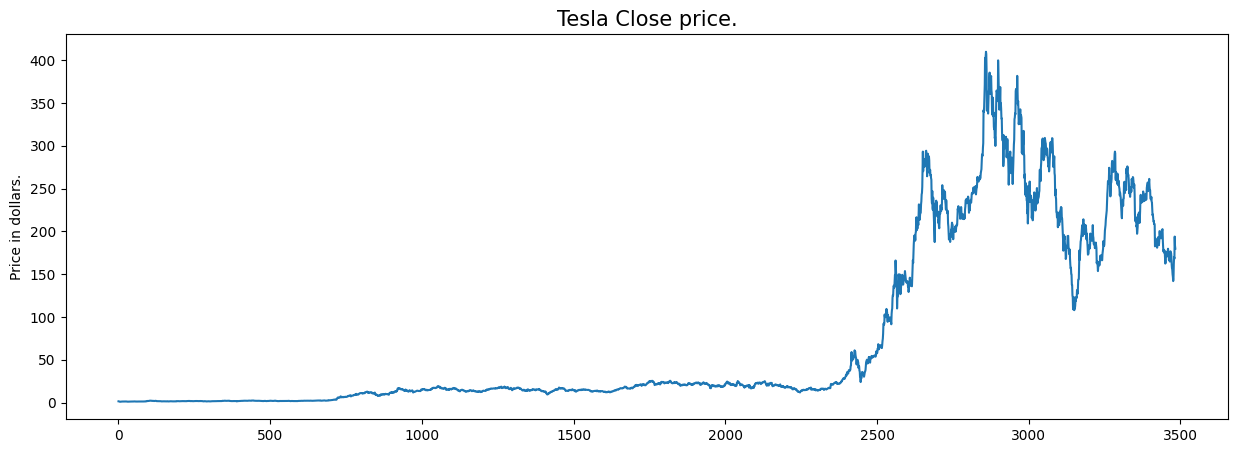

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [36]:
df[df['Close'] == df['Adj Close']].shape

(3484, 7)

In [37]:
df = df.drop(['Adj Close'], axis=1)


In [40]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

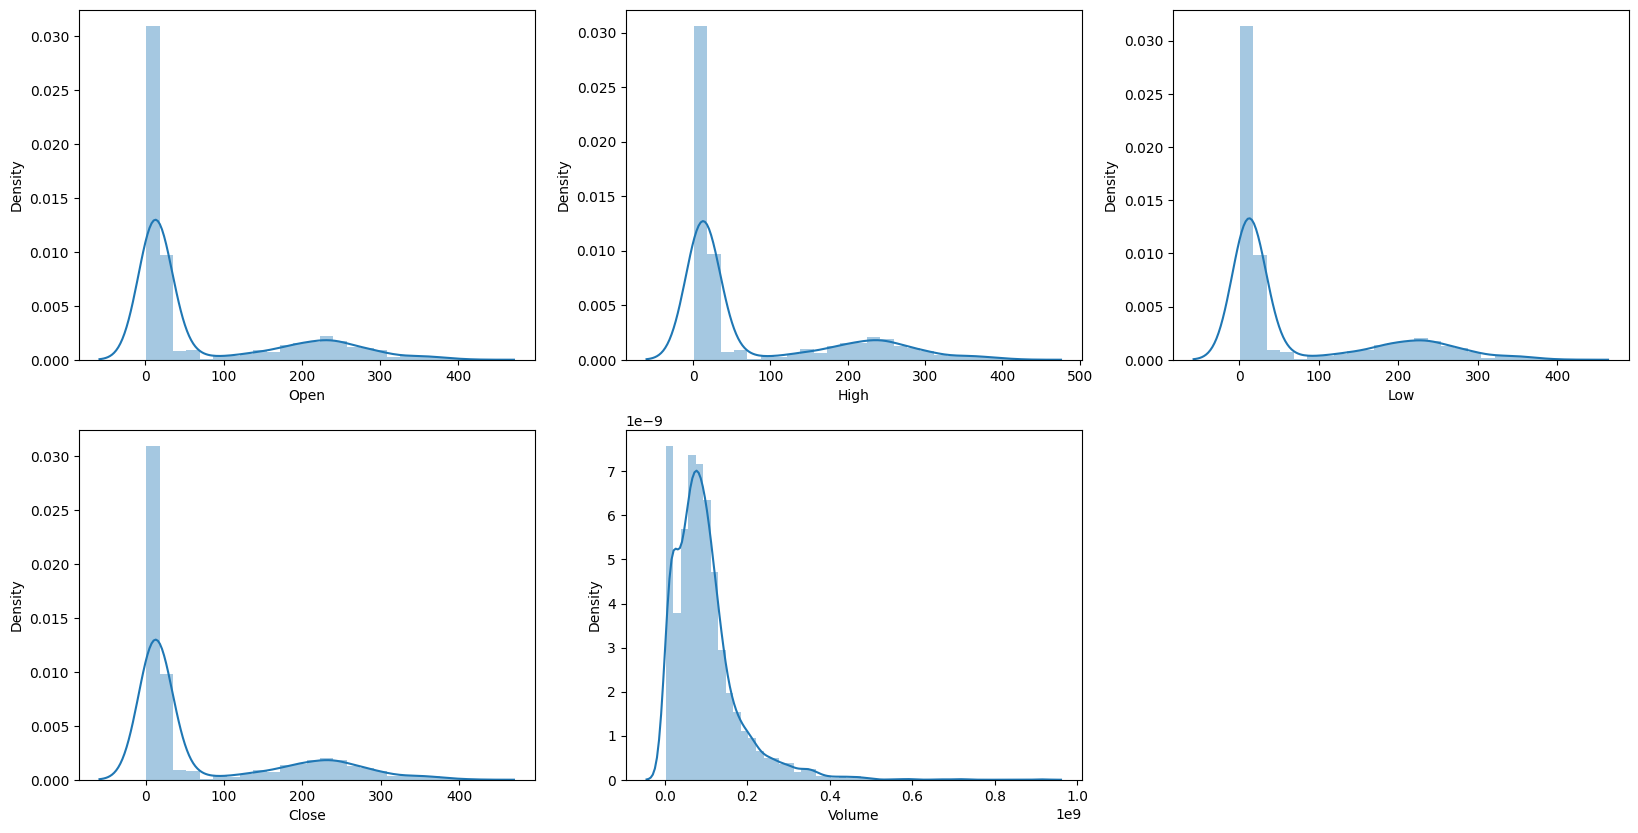

In [41]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

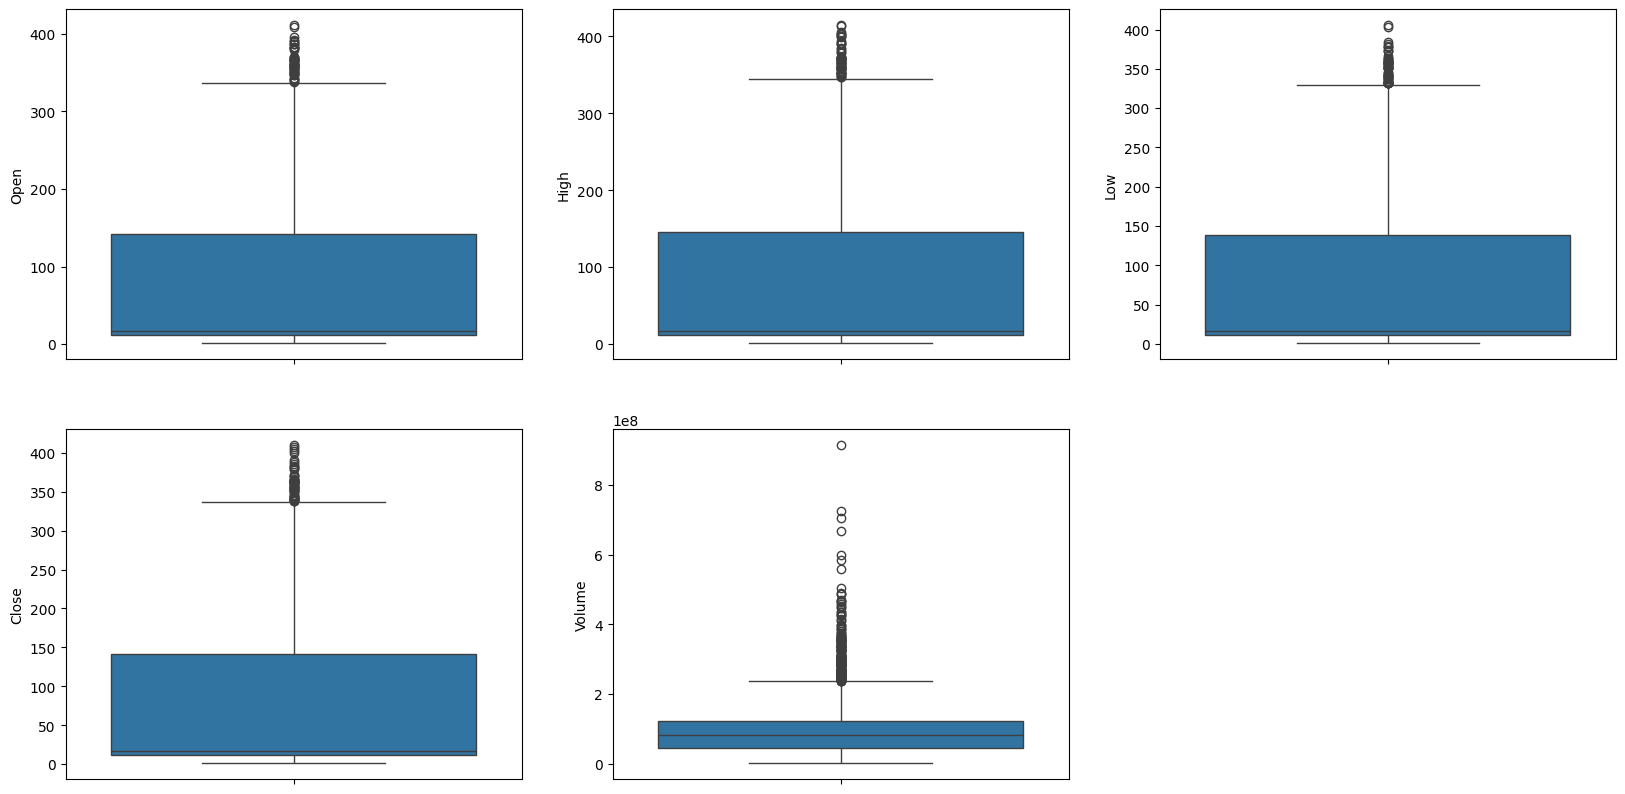

In [42]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [44]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,281494500,29,6,2010
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,257806500,30,6,2010
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,123282000,1,7,2010
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,77097000,2,7,2010
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,103003500,6,7,2010


In [45]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,281494500,29,6,2010,1
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,257806500,30,6,2010,1
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,123282000,1,7,2010,0
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,77097000,2,7,2010,0
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,103003500,6,7,2010,0


In [52]:
df.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
day                 int64
month               int64
year                int64
is_quarter_end      int64
dtype: object

In [57]:
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

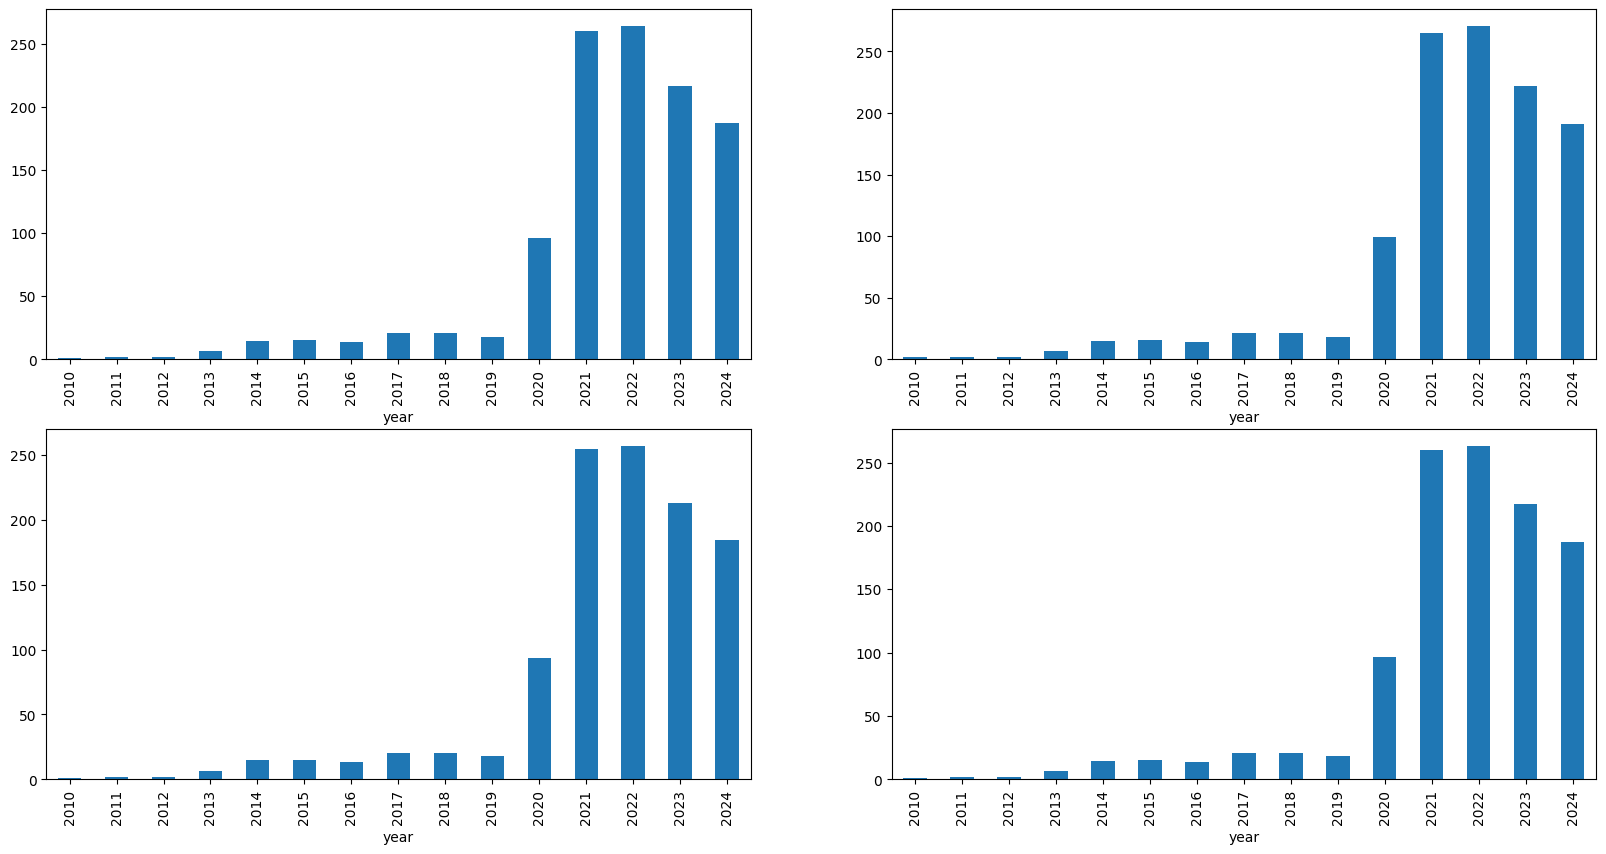

In [58]:
data_grouped = df.groupby('year').mean()

plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [59]:
df.groupby('is_quarter_end').mean()


,Date,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,NaN,72.862424,74.456895,71.136879,72.824038,9.850203e+07,15.692109,6.099612,2016.925830
1,NaN,74.226597,75.837584,72.510186,74.232203,9.404914e+07,15.806009,7.462661,2016.866953


In [60]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


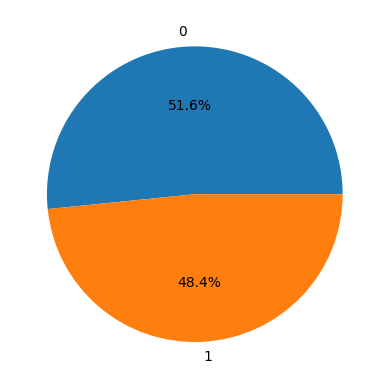

In [61]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


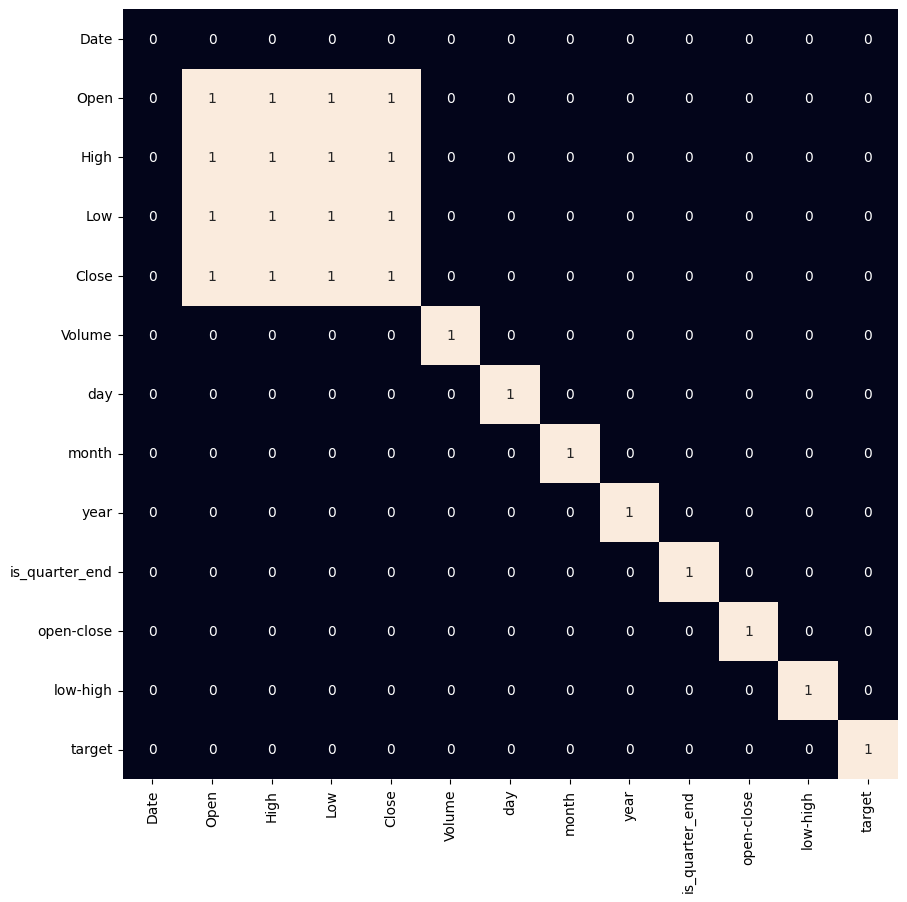

In [62]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [65]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(3135, 3) (349, 3)


In [67]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
	  Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
	  Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5093337232737398
Validation Accuracy :  0.5585460782373507

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.49964624313055883
Validation Accuracy :  0.47407480704531957

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Trainin

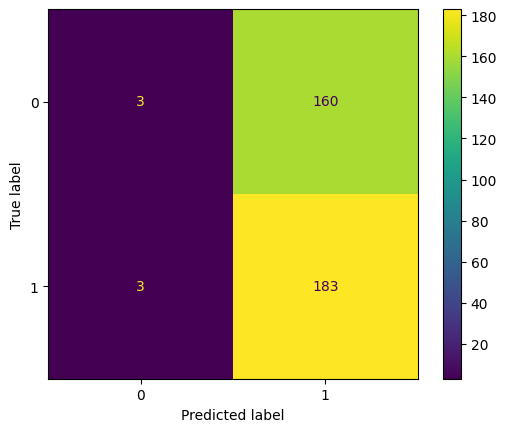

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()
